<a href="https://colab.research.google.com/github/rpizarrog/machine_learning_r_python_casos_de_estudio/blob/main/notebook_Python/pca_dataset_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Aplicar reducci√≥n de dimensionalidad mediante modelo de an√°lisis de componentes principales (PCA) en un conjunto de datos ventas de autoservicio.

# Cargar librer√≠as


In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Fijar semilla para reproducibilidad
np.random.seed(42)

# Simulaci√≥n de un dataset de retail con alta correlaci√≥n entre variables
n = 3000

# Variable base: ventas totales
ventas_totales = np.random.normal(1000, 200, n)

# Generamos variables muy correlacionadas con "ventas_totales"
clientes = ventas_totales / 50 + np.random.normal(0, 5, n)
ticket_promedio = ventas_totales / clientes + np.random.normal(0, 2, n)
productos_vendidos = ventas_totales / 20 + np.random.normal(0, 10, n)
ventas_online = ventas_totales * 0.4 + np.random.normal(0, 50, n)
ventas_tienda = ventas_totales * 0.6 + np.random.normal(0, 50, n)
gastos_operativos = ventas_totales * 0.3 + np.random.normal(0, 30, n)
publicidad = ventas_totales * 0.1 + np.random.normal(0, 10, n)
inventario = ventas_totales * 0.5 + np.random.normal(0, 40, n)
personal = ventas_totales / 100 + np.random.normal(0, 2, n)
descuentos = ventas_totales * 0.05 + np.random.normal(0, 5, n)
competencia_precios = np.random.normal(100, 10, n)  # Menos correlacionada
satisfaccion_clientes = np.random.normal(4, 0.5, n) # Casi independiente
dias_festivos = np.random.randint(0, 2, n)          # Binaria
region = np.random.choice(["Norte","Sur","Este","Oeste"], n)

# Construir DataFrame
datos = pd.DataFrame({
    "ventas_totales": ventas_totales,
    "clientes": clientes,
    "ticket_promedio": ticket_promedio,
    "productos_vendidos": productos_vendidos,
    "ventas_online": ventas_online,
    "ventas_tienda": ventas_tienda,
    "gastos_operativos": gastos_operativos,
    "publicidad": publicidad,
    "inventario": inventario,
    "personal": personal,
    "descuentos": descuentos,
    "competencia_precios": competencia_precios,
    "satisfaccion_clientes": satisfaccion_clientes,
    "dias_festivos": dias_festivos,
    "region": region
})

datos.to_csv('dataset_ventas.csv', index=False)

# Cargar datos

In [3]:
datos = pd.read_csv('https://raw.githubusercontent.com/rpizarrog/machine_learning_r_python_casos_de_estudio/refs/heads/main/datos/datos_ventas.csv')

# Describir datos


In [4]:

print(datos.describe())


       ventas_totales     clientes  ticket_promedio  productos_vendidos  \
count     3000.000000  3000.000000      3000.000000         3000.000000   
mean      1006.400167    19.936786        56.105850           50.109553   
std        197.361517     6.374519        33.881869           14.009489   
min        351.746532    -0.971268      -573.006380            1.511240   
25%        874.491772    15.627464        43.075133           40.425754   
50%       1004.872963    19.947442        50.214080           50.376095   
75%       1134.718177    24.188212        61.230371           59.355799   
max       1785.247541    43.010450       784.974857           97.393110   

       ventas_online  ventas_tienda  gastos_operativos   publicidad  \
count    3000.000000    3000.000000        3000.000000  3000.000000   
mean      404.291191     604.749959         301.807416   100.540574   
std        92.604650     128.532193          66.441699    21.772351   
min        67.030781     183.172770     

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ventas_totales         3000 non-null   float64
 1   clientes               3000 non-null   float64
 2   ticket_promedio        3000 non-null   float64
 3   productos_vendidos     3000 non-null   float64
 4   ventas_online          3000 non-null   float64
 5   ventas_tienda          3000 non-null   float64
 6   gastos_operativos      3000 non-null   float64
 7   publicidad             3000 non-null   float64
 8   inventario             3000 non-null   float64
 9   personal               3000 non-null   float64
 10  descuentos             3000 non-null   float64
 11  competencia_precios    3000 non-null   float64
 12  satisfaccion_clientes  3000 non-null   float64
 13  dias_festivos          3000 non-null   int64  
 14  region                 3000 non-null   object 
dtypes: f

# Explorar datos

## Los primeros 10 registros


In [6]:
np.round(datos, 2).head(10)


ventas_totales  clientes  ticket_promedio  productos_vendidos  \
0         1099.34     12.45            86.09               62.62   
1          972.35     15.15            62.94               59.35   
2         1129.54     20.52            53.15               61.46   
3         1304.61     35.53            35.62               45.81   
4          953.17     21.85            43.20               46.10   
5          953.17     12.39            78.63               36.10   
6         1315.84     28.75            45.13               63.77   
7         1153.49     15.33            72.06               67.47   
8          906.11     23.54            40.78               48.36   
9         1108.51     19.81            54.27               66.91   

   ventas_online  ventas_tienda  gastos_operativos  publicidad  inventario  \
0         498.48         652.43             339.46      135.05      522.82   
1         294.99         581.78             268.26       97.04      457.62   
2         435.43         680.94             359.60      109.83      621.79   
3         519.76         830.11             373.67      125.24      726.88   
4         382.06         534.54             308.44       99.08      439.43   
5         390.29         529.59             277.73       99.18      449.83   
6         556.86         851.34             343.12      141.09      703.62   
7         459.62         668.96             316.57      106.09      598.08   
8         344.04         480.51             258.92       87.49      480.11   
9         423.03         640.85             373.60      131.16      590.12   

   personal  descuentos  competencia_precios  satisfaccion_clientes  \
0      9.43       45.06                94.81                   4.28   
1     12.05       43.34               107.03                   3.92   
2     12.86       53.54                96.23                   4.20   
3     13.00       65.98                96.73                   4.18   
4      9.82       52.78                93.57                   3.75   
5      9.51       51.13                91.71                   3.82   
6     14.13       59.90               103.54                   4.30   
7      9.94       55.82               104.84                   4.91   
8     10.79       45.69               102.27                   4.60   
9     11.79       54.11                93.84                   3.44   

   dias_festivos region  
0              1  Oeste  
1              1  Norte  
2              1   Este  
3              0    Sur  
4              0   Este  
5              0  Norte  
6              1  Norte  
7              0    Sur  
8              0  Norte  
9              0    Sur

## Los √∫ltimos 10 registros

In [7]:
np.round(datos, 2).tail(10)

ventas_totales  clientes  ticket_promedio  productos_vendidos  \
2990         1303.28     28.75            48.53               59.94   
2991         1120.42     23.94            48.58               41.51   
2992         1014.41     15.30            66.01               46.66   
2993          957.56     21.75            40.41               38.41   
2994          809.62     20.51            39.44               44.99   
2995         1015.50     21.17            48.18               38.96   
2996         1051.55     26.79            41.58               51.85   
2997          751.65      8.95            87.20               45.96   
2998         1066.84     23.68            43.69               52.33   
2999          968.95     13.53            73.23               38.98   

      ventas_online  ventas_tienda  gastos_operativos  publicidad  inventario  \
2990         588.87         829.08             352.21      148.84      671.51   
2991         493.84         723.47             323.72      117.29      533.52   
2992         416.38         587.16             315.62      112.58      504.55   
2993         395.05         590.30             308.01       99.77      428.03   
2994         308.65         420.33             220.29       84.08      363.34   
2995         360.72         658.55             291.43      113.20      537.25   
2996         482.48         591.76             359.28      111.84      530.41   
2997         366.27         490.25             260.35       77.27      344.78   
2998         382.53         582.64             326.30      108.74      538.20   
2999         379.89         632.94             223.59      102.28      460.19   

      personal  descuentos  competencia_precios  satisfaccion_clientes  \
2990     12.60       69.64               102.78                   4.40   
2991     14.85       57.40               107.42                   2.79   
2992     11.90       50.81                90.69                   3.60   
2993      7.11       41.35               104.60                   4.70   
2994      5.57       31.93                77.71                   4.15   
2995      9.00       47.60                89.51                   3.62   
2996     13.40       54.39                95.43                   3.40   
2997      6.51       34.65               103.57                   4.42   
2998      6.88       57.84               108.69                   4.04   
2999      9.23       43.68               100.83                   3.89   

      dias_festivos region  
2990              0   Este  
2991              0  Norte  
2992              1   Este  
2993              1  Oeste  
2994              1    Sur  
2995              1  Oeste  
2996              1  Norte  
2997              1   Este  
2998              0    Sur  
2999              0  Norte

print(datos.tail(10))

# Preparaci√≥n de datos
## Variables numericas y categ√≥ricas

In [8]:
# Separar variables num√©ricas y categ√≥ricas
variables_numericas = datos.select_dtypes(include=[np.number]).columns.tolist()
variables_categoricas = datos.select_dtypes(exclude=[np.number]).columns.tolist()
print("Variables num√©ricas", variables_numericas)
print("Variables categ√≥ricas", variables_categoricas)


Variables num√©ricas ['ventas_totales', 'clientes', 'ticket_promedio', 'productos_vendidos', 'ventas_online', 'ventas_tienda', 'gastos_operativos', 'publicidad', 'inventario', 'personal', 'descuentos', 'competencia_precios', 'satisfaccion_clientes', 'dias_festivos']
Variables categ√≥ricas ['region']


## Normalizar datos


In [9]:
scaler = StandardScaler()
datos_escalados = datos.copy()
datos_escalados[variables_numericas] = scaler.fit_transform(datos[variables_numericas])

In [10]:
np.round(datos_escalados, 4).head(10)

ventas_totales  clientes  ticket_promedio  productos_vendidos  \
0          0.4710   -1.1750           0.8850              0.8932   
1         -0.1726   -0.7518           0.2018              0.6598   
2          0.6240    0.0919          -0.0871              0.8106   
3          1.5112    2.4467          -0.6047             -0.3073   
4         -0.2698    0.2996          -0.3809             -0.2859   
5         -0.2697   -1.1847           0.6649             -1.0001   
6          1.5682    1.3823          -0.3240              0.9750   
7          0.7454   -0.7223           0.4709              1.2397   
8         -0.5083    0.5646          -0.4524             -0.1251   
9          0.5175   -0.0192          -0.0542              1.1992   

   ventas_online  ventas_tienda  gastos_operativos  publicidad  inventario  \
0         1.0173         0.3711             0.5668      1.5851      0.1794   
1        -1.1805        -0.1788            -0.5049     -0.1610     -0.4313   
2         0.3363         0.5928             0.8700      0.4266      1.1064   
3         1.2471         1.7536             1.0818      1.1345      2.0908   
4        -0.2401        -0.5463             0.0998     -0.0671     -0.6017   
5        -0.1512        -0.5849            -0.3625     -0.0624     -0.5043   
6         1.6478         1.9188             0.6219      1.8628      1.8729   
7         0.5976         0.4996             0.2223      0.2548      0.8844   
8        -0.6507        -0.9668            -0.6456     -0.5997     -0.2207   
9         0.2023         0.2809             1.0807      1.4064      0.8098   

   personal  descuentos  competencia_precios  satisfaccion_clientes  \
0   -0.2050     -0.4728              -0.4870                 0.5941   
1    0.7268     -0.6295               0.7095                -0.1539   
2    1.0142      0.2986              -0.3476                 0.4276   
3    1.0647      1.4304              -0.2991                 0.3732   
4   -0.0650      0.2293              -0.6085                -0.5123   
5   -0.1734      0.0791              -0.7900                -0.3543   
6    1.4653      0.8768               0.3679                 0.6286   
7   -0.0240      0.5056               0.4947                 1.8752   
8    0.2777     -0.4161               0.2436                 1.2526   
9    0.6348      0.3508              -0.5818                -1.1501   

   dias_festivos region  
0         0.9881  Oeste  
1         0.9881  Norte  
2         0.9881   Este  
3        -1.0121    Sur  
4        -1.0121   Este  
5        -1.0121  Norte  
6         0.9881  Norte  
7        -1.0121    Sur  
8        -1.0121  Norte  
9        -1.0121    Sur

In [11]:
np.round(datos_escalados, 4).tail(10)

ventas_totales  clientes  ticket_promedio  productos_vendidos  \
2990          1.5045    1.3835          -0.2237              0.7017   
2991          0.5778    0.6282          -0.2220             -0.6139   
2992          0.0406   -0.7280           0.2923             -0.2464   
2993         -0.2475    0.2837          -0.4634             -0.8354   
2994         -0.9972    0.0899          -0.4921             -0.3652   
2995          0.0461    0.1931          -0.2340             -0.7958   
2996          0.2288    1.0759          -0.4288              0.1242   
2997         -1.2910   -1.7245           0.9178             -0.2961   
2998          0.3063    0.5868          -0.3665              0.1589   
2999         -0.1898   -1.0056           0.5055             -0.7943   

      ventas_online  ventas_tienda  gastos_operativos  publicidad  inventario  \
2990         1.9935         1.7456             0.7587      2.2187      1.5721   
2991         0.9672         0.9238             0.3298      0.7692      0.2797   
2992         0.1305        -0.1369             0.2080      0.5532      0.0082   
2993        -0.0998        -0.1124             0.0933     -0.0352     -0.7085   
2994        -1.0330        -1.4350            -1.2271     -0.7564     -1.3144   
2995        -0.4706         0.4186            -0.1563      0.5814      0.3146   
2996         0.8444        -0.1010             0.8652      0.5192      0.2505   
2997        -0.4106        -0.8910            -0.6240     -1.0692     -1.4883   
2998        -0.2350        -0.1721             0.3688      0.3767      0.3234   
2999        -0.2635         0.2194            -1.1775      0.0798     -0.4073   

      personal  descuentos  competencia_precios  satisfaccion_clientes  \
2990    0.9200      1.7631               0.2934                 0.8318   
2991    1.7214      0.6493               0.7473                -2.4845   
2992    0.6722      0.0503              -0.8898                -0.8194   
2993   -1.0264     -0.8108               0.4716                 1.4609   
2994   -1.5721     -1.6679              -2.1603                 0.3166   
2995   -0.3560     -0.2418              -1.0056                -0.7691   
2996    1.2071      0.3755              -0.4264                -1.2252   
2997   -1.2385     -1.4201               0.3710                 0.8750   
2998   -1.1073      0.6900               0.8721                 0.0913   
2999   -0.2739     -0.5990               0.1023                -0.2137   

      dias_festivos region  
2990        -1.0121   Este  
2991        -1.0121  Norte  
2992         0.9881   Este  
2993         0.9881  Oeste  
2994         0.9881    Sur  
2995         0.9881  Oeste  
2996         0.9881  Norte  
2997         0.9881   Este  
2998        -1.0121    Sur  
2999        -1.0121  Norte

# Aplicar el modelo de PCA

In [12]:
# Construir el PCA
pca = PCA()
pca.fit(datos_escalados[variables_numericas])

PCA()

## Autovalores


In [13]:
print("=" * 60)
print("AUTOVALORES (EIGENVALUES)")
print("=" * 60)
autovalores = pca.explained_variance_
for i, valor in enumerate(autovalores):
    print(f"Componente {i+1}: {valor:.4f}")

AUTOVALORES (EIGENVALUES)
Componente 1: 7.4236
Componente 2: 1.2752
Componente 3: 1.0468
Componente 4: 0.9847
Componente 5: 0.9701
Componente 6: 0.4956
Componente 7: 0.4699
Componente 8: 0.3159
Componente 9: 0.2686
Componente 10: 0.2081
Componente 11: 0.2060
Componente 12: 0.1690
Componente 13: 0.1432
Componente 14: 0.0280


## Autovectores


In [14]:
print("\n" + "=" * 60)
print("AUTOVECTORES (COMPONENTES PRINCIPALES)")
print("=" * 60)
autovectores = pca.components_
autovectores_df = pd.DataFrame(autovectores,
                              columns=variables_numericas,
                              index=[f'PC{i+1}' for i in range(len(autovectores))])
print(autovectores_df.round(4))


AUTOVECTORES (COMPONENTES PRINCIPALES)
      ventas_totales  clientes  ticket_promedio  productos_vendidos  \
PC1           0.3608    0.2447          -0.0570              0.2748   
PC2           0.0565   -0.5226           0.8288              0.0862   
PC3           0.0016    0.0066           0.0271             -0.0021   
PC4          -0.0035   -0.0341           0.0477             -0.0092   
PC5          -0.0024    0.0151          -0.0383             -0.0024   
PC6          -0.0342    0.0046           0.0175             -0.3322   
PC7          -0.0772   -0.0610          -0.0782              0.8893   
PC8          -0.0053    0.7691           0.5241              0.0057   
PC9          -0.0690    0.2401           0.1424              0.1107   
PC10          0.0205   -0.0489          -0.0233             -0.0017   
PC11          0.0056   -0.0046          -0.0016              0.0391   
PC12          0.0821   -0.0933          -0.0568             -0.0108   
PC13          0.0539   -0.0178       

## Varianza explicada


In [15]:
print("=" * 60)
print("VARIANZA EXPLICADA")
print("=" * 60)
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

# Crear tabla de varianza
varianza_df = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(varianza_explicada))],
    'Autovalor': autovalores,
    'Varianza_Explicada': varianza_explicada,
    'Varianza_Acumulada': varianza_acumulada
})

print(varianza_df.round(4))

VARIANZA EXPLICADA
   Componente  Autovalor  Varianza_Explicada  Varianza_Acumulada
0         PC1     7.4236              0.5301              0.5301
1         PC2     1.2752              0.0911              0.6211
2         PC3     1.0468              0.0747              0.6959
3         PC4     0.9847              0.0703              0.7662
4         PC5     0.9701              0.0693              0.8355
5         PC6     0.4956              0.0354              0.8708
6         PC7     0.4699              0.0336              0.9044
7         PC8     0.3159              0.0226              0.9270
8         PC9     0.2686              0.0192              0.9461
9        PC10     0.2081              0.0149              0.9610
10       PC11     0.2060              0.0147              0.9757
11       PC12     0.1690              0.0121              0.9878
12       PC13     0.1432              0.0102              0.9980
13       PC14     0.0280              0.0020              1.0000


## Componentes


In [16]:
# =============================================================================
# 4. AN√ÅLISIS DETALLADO
# =============================================================================
print("\n" + "=" * 60)
print("AN√ÅLISIS DETALLADO")
print("=" * 60)

# Componentes m√°s importantes por varianza
print(f"\nN√∫mero total de componentes: {pca.n_components_}")
print(f"Varianza total explicada: {varianza_acumulada[-1]:.4f}")

# Componentes necesarios para explicar el 80% y 90% de varianza
umbral_80 = np.where(varianza_acumulada >= 0.8)[0]
umbral_90 = np.where(varianza_acumulada >= 0.9)[0]

if len(umbral_80) > 0:
    print(f"Componentes para 80% varianza: {umbral_80[0] + 1}")
if len(umbral_90) > 0:
    print(f"Componentes para 90% varianza: {umbral_90[0] + 1}")



AN√ÅLISIS DETALLADO

N√∫mero total de componentes: 14
Varianza total explicada: 1.0000
Componentes para 80% varianza: 5
Componentes para 90% varianza: 7


## Variables para cada componente


In [17]:
# =============================================================================
# VARIABLES M√ÅS IMPORTANTES EN CADA COMPONENTE
# =============================================================================
print("\n" + "=" * 60)
print("VARIABLES M√ÅS IMPORTANTES POR COMPONENTE (Top 3)")
print("=" * 60)

for i, componente in enumerate(autovectores):
    # Obtener √≠ndices de las 3 variables con mayor peso absoluto
    indices_importantes = np.argsort(np.abs(componente))[-3:][::-1]

    print(f"\nComponente PC{i+1}:")
    for idx in indices_importantes:
        variable = variables_numericas[idx]
        peso = componente[idx]
        print(f"  {variable}: {peso:.4f}")


VARIABLES M√ÅS IMPORTANTES POR COMPONENTE (Top 3)

Componente PC1:
  ventas_totales: 0.3608
  inventario: 0.3414
  ventas_tienda: 0.3389

Componente PC2:
  ticket_promedio: 0.8288
  clientes: -0.5226
  productos_vendidos: 0.0862

Componente PC3:
  satisfaccion_clientes: 0.6362
  dias_festivos: -0.5834
  competencia_precios: 0.5026

Componente PC4:
  competencia_precios: 0.8091
  dias_festivos: 0.5729
  satisfaccion_clientes: -0.1151

Componente PC5:
  satisfaccion_clientes: 0.7613
  dias_festivos: 0.5747
  competencia_precios: -0.2959

Componente PC6:
  personal: 0.9238
  productos_vendidos: -0.3322
  ventas_online: -0.0976

Componente PC7:
  productos_vendidos: 0.8893
  personal: 0.2496
  ventas_online: -0.2417

Componente PC8:
  clientes: 0.7691
  ticket_promedio: 0.5241
  ventas_online: -0.3485

Componente PC9:
  ventas_online: 0.8067
  descuentos: -0.4110
  clientes: 0.2401

Componente PC10:
  gastos_operativos: 0.6984
  descuentos: -0.6765
  ventas_online: -0.1986

Componente PC1

## Otra alternativa visual


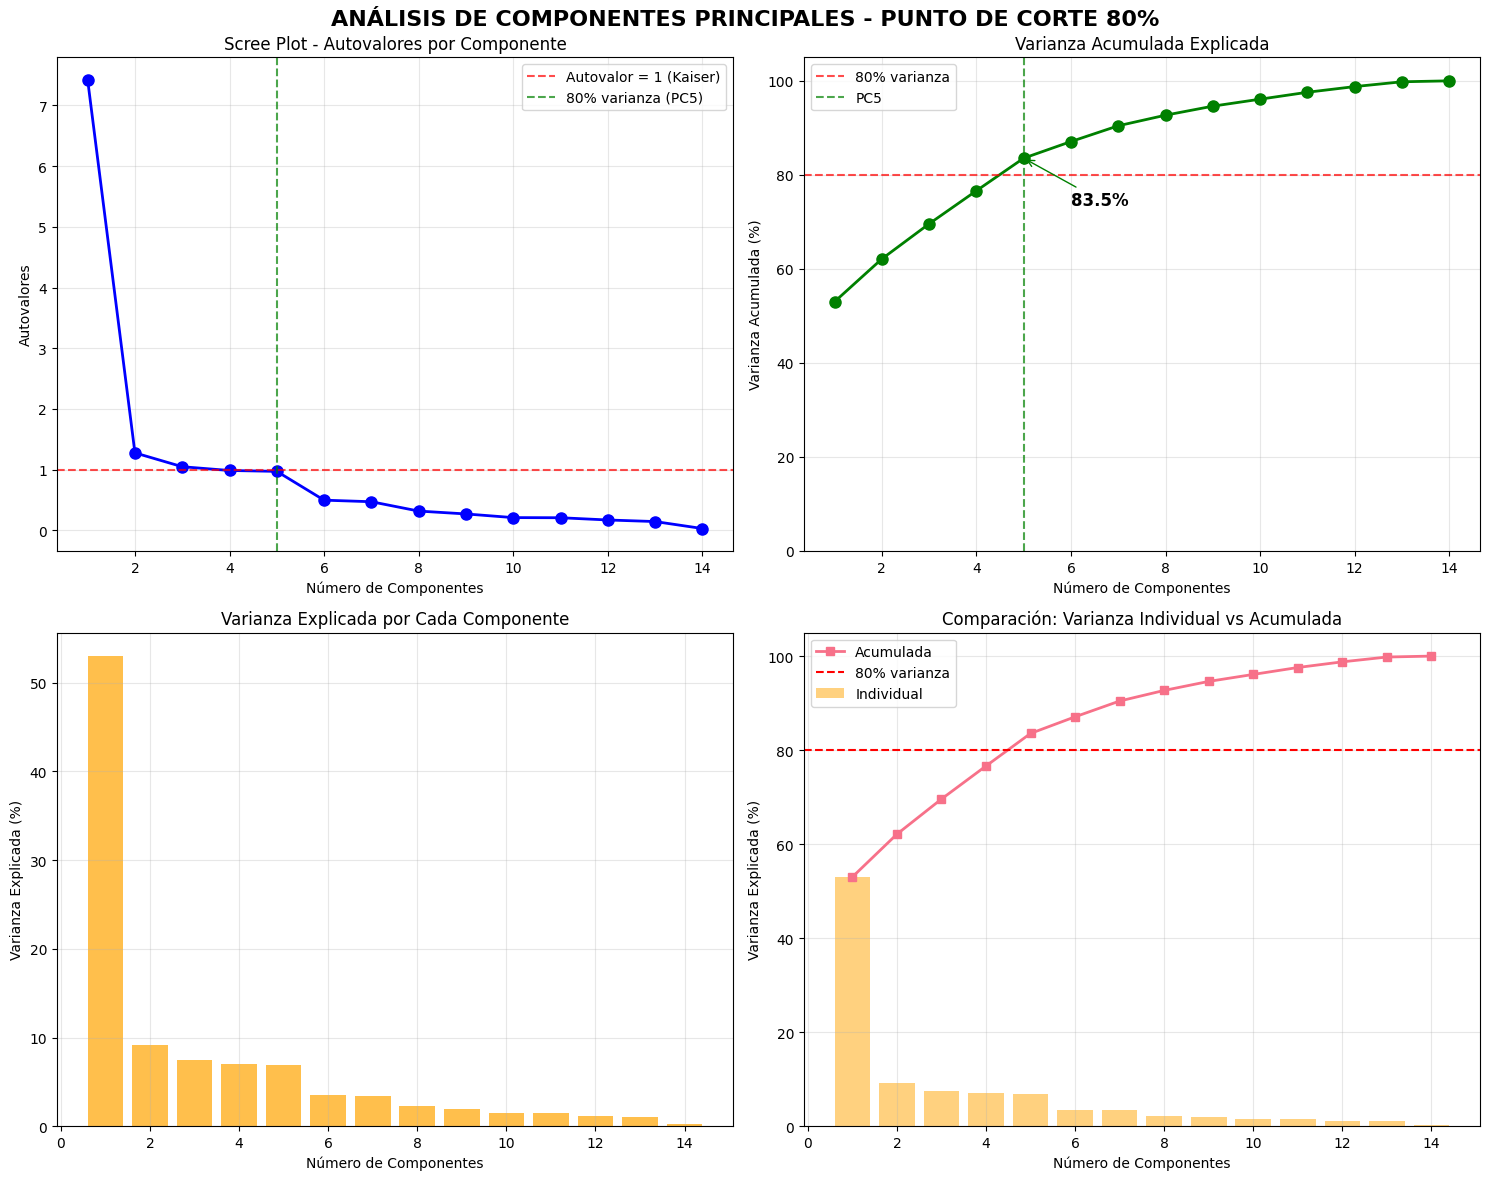

RECOMENDACI√ìN DE COMPONENTES PRINCIPALES

üìä **AN√ÅLISIS DEL DATASET:**
   - Variables originales: 14
   - Total de componentes posibles: 14

üéØ **PUNTO DE CORTE AL 80%:**
   - Componentes necesarios: 5
   - Varianza explicada: 83.55%
   - Reducci√≥n dimensional: 14 ‚Üí 5 variables
   - Porcentaje de reducci√≥n: 64.3%

üìà **DETALLE DE VARIANZA:**
   PC1: 53.01% (Acum: 53.01%)
   PC2: 9.11% (Acum: 62.11%)
   PC3: 7.47% (Acum: 69.59%)
   PC4: 7.03% (Acum: 76.62%)
   PC5: 6.93% (Acum: 83.55%)
   PC6: 3.54% (Acum: 87.08%)
   PC7: 3.36% (Acum: 90.44%)
   PC8: 2.26% (Acum: 92.70%)
   PC9: 1.92% (Acum: 94.61%)
   PC10: 1.49% (Acum: 96.10%)

üí° **INTERPRETACI√ìN:**
   ‚úÖ Buena reducci√≥n dimensional. Mantenibilidad √≥ptima

üîß **SUGERENCIA PR√ÅCTICA:**
   Usar PCA(n_components=5) para el modelo

üìä **AUTOVALORES DE LOS PRIMEROS 5 COMPONENTES:**
   PC1: 7.424
   PC2: 1.275
   PC3: 1.047
   PC4: 0.985
   PC5: 0.970

üìè **REGLA DE KAISER (autovalores > 1):** 3 componentes


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gr√°ficos
plt.style.use('default')
sns.set_palette("husl")



# Obtener m√©tricas
autovalores = pca.explained_variance_
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

# Encontrar el n√∫mero de componentes para el 80%
n_componentes_80 = np.where(varianza_acumulada >= 0.8)[0][0] + 1
porcentaje_80 = varianza_acumulada[n_componentes_80 - 1] * 100

# =============================================================================
# VISUALIZACI√ìN COMPLETA
# =============================================================================
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('AN√ÅLISIS DE COMPONENTES PRINCIPALES - PUNTO DE CORTE 80%',
             fontsize=16, fontweight='bold')

# 1. SCREE PLOT (Autovalores)
ax1.plot(range(1, len(autovalores) + 1), autovalores, 'bo-', linewidth=2, markersize=8)
ax1.axhline(y=1, color='r', linestyle='--', alpha=0.7, label='Autovalor = 1 (Kaiser)')
ax1.axvline(x=n_componentes_80, color='g', linestyle='--', alpha=0.7,
           label=f'80% varianza (PC{n_componentes_80})')
ax1.set_xlabel('N√∫mero de Componentes')
ax1.set_ylabel('Autovalores')
ax1.set_title('Scree Plot - Autovalores por Componente')
ax1.grid(True, alpha=0.3)
ax1.legend()

# 2. VARIANZA EXPLICADA ACUMULADA
ax2.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada * 100,
        'go-', linewidth=2, markersize=8)
ax2.axhline(y=80, color='r', linestyle='--', alpha=0.7, label='80% varianza')
ax2.axvline(x=n_componentes_80, color='g', linestyle='--', alpha=0.7,
           label=f'PC{n_componentes_80}')
ax2.set_xlabel('N√∫mero de Componentes')
ax2.set_ylabel('Varianza Acumulada (%)')
ax2.set_title('Varianza Acumulada Explicada')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_ylim(0, 105)

# A√±adir anotaci√≥n del punto de corte
ax2.annotate(f'{porcentaje_80:.1f}%',
            xy=(n_componentes_80, varianza_acumulada[n_componentes_80-1]*100),
            xytext=(n_componentes_80+1, varianza_acumulada[n_componentes_80-1]*100-10),
            arrowprops=dict(arrowstyle='->', color='green'),
            fontsize=12, fontweight='bold')

# 3. VARIANZA EXPLICADA INDIVIDUAL
ax3.bar(range(1, len(varianza_explicada) + 1), varianza_explicada * 100,
       alpha=0.7, color='orange')
ax3.set_xlabel('N√∫mero de Componentes')
ax3.set_ylabel('Varianza Explicada (%)')
ax3.set_title('Varianza Explicada por Cada Componente')
ax3.grid(True, alpha=0.3)

# 4. COMPARACI√ìN COMPONENTES vs VARIANZA
componentes = range(1, len(varianza_acumulada) + 1)
ax4.plot(componentes, varianza_acumulada * 100, 's-', label='Acumulada', linewidth=2)
ax4.bar(componentes, varianza_explicada * 100, alpha=0.5, label='Individual', color='orange')
ax4.axhline(y=80, color='r', linestyle='--', label='80% varianza')
ax4.set_xlabel('N√∫mero de Componentes')
ax4.set_ylabel('Varianza Explicada (%)')
ax4.set_title('Comparaci√≥n: Varianza Individual vs Acumulada')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# RECOMENDACI√ìN Y AN√ÅLISIS
# =============================================================================
print("=" * 70)
print("RECOMENDACI√ìN DE COMPONENTES PRINCIPALES")
print("=" * 70)

print(f"\nüìä **AN√ÅLISIS DEL DATASET:**")
print(f"   - Variables originales: {len(variables_numericas)}")
print(f"   - Total de componentes posibles: {pca.n_components_}")

print(f"\nüéØ **PUNTO DE CORTE AL 80%:**")
print(f"   - Componentes necesarios: {n_componentes_80}")
print(f"   - Varianza explicada: {porcentaje_80:.2f}%")
print(f"   - Reducci√≥n dimensional: {len(variables_numericas)} ‚Üí {n_componentes_80} variables")
print(f"   - Porcentaje de reducci√≥n: {(1 - n_componentes_80/len(variables_numericas)) * 100:.1f}%")

print(f"\nüìà **DETALLE DE VARIANZA:**")
for i in range(min(10, len(varianza_explicada))):  # Mostrar primeros 10 componentes
    print(f"   PC{i+1}: {varianza_explicada[i]*100:.2f}% (Acum: {varianza_acumulada[i]*100:.2f}%)")

print(f"\nüí° **INTERPRETACI√ìN:**")
if n_componentes_80 <= 3:
    print("   ‚úÖ Excelente reducci√≥n dimensional! Puedes visualizar en 2D/3D")
elif n_componentes_80 <= 5:
    print("   ‚úÖ Buena reducci√≥n dimensional. Mantenibilidad √≥ptima")
else:
    print("   ‚ö†Ô∏è Reducci√≥n moderada. Considerar si se necesita m√°s componentes")

print(f"\nüîß **SUGERENCIA PR√ÅCTICA:**")
print(f"   Usar PCA(n_components={n_componentes_80}) para el modelo")


# Mostrar autovalores de los componentes recomendados
print(f"\nüìä **AUTOVALORES DE LOS PRIMEROS {n_componentes_80} COMPONENTES:**")
for i in range(n_componentes_80):
    print(f"   PC{i+1}: {autovalores[i]:.3f}")

# Regla de Kaiser (autovalores > 1)
componentes_kaiser = np.sum(autovalores > 1)
print(f"\nüìè **REGLA DE KAISER (autovalores > 1):** {componentes_kaiser} componentes")

# Evaluaci√≥n del modelo


# Reducci√≥n de dimensionalidad

Algunas evaluaciones que distinguen fortalezas del modelo son que el PCA para estos datos, captura alrededor del 80% de la varianza acumulada en 4 a 5 dimensiones; las variables correlacionadas se condensan en un solo factor interpretable; con las gr√°ficas se facilita visualizaci√≥n y segmentaci√≥n de registros.

Algunas limitantes a manera de evaluaci√≥n es que algunas variables casi independientes (por ejemplo satisfacci√≥n_clientes, competencia_precios, d√≠as festivos) no se resumen bien en los primeros componentes, habr√° que identificar si son cr√≠ticas para el an√°lisis, habr√≠a que analizarlas por separado o prescindir de ellas en la construcci√≥n del modelo en un segundo proceso; adem√°s, el PCA es lineal, es decir, no captura relaciones no lineales entre variables.


In [19]:
print(f"\n" + "=" * 70)
print("C√ìDIGO PARA IMPLEMENTAR LA REDUCCI√ìN")
print("=" * 70)

# Reducir a 5 componentes (80% de varianza aprox)
pca = PCA(n_components=5)
pca_reducido = pca.fit_transform(datos_escalados[variables_numericas])

# Convertir a DataFrame
datos_reducido = pd.DataFrame(pca_reducido,
                           columns=[f"PC{i+1}" for i in range(pca.n_components_)])
print(datos_reducido.head(10))
print(datos_reducido.tail(10))


C√ìDIGO PARA IMPLEMENTAR LA REDUCCI√ìN
        PC1       PC2       PC3       PC4       PC5
0  1.085944  1.687214 -0.453103  0.185934  1.088774
1 -0.879559  0.397614 -0.320094  1.180752  0.222975
2  1.962938  0.277565 -0.480234  0.236120  0.997836
3  4.280305 -1.125286  0.692836 -0.953064 -0.174231
4 -0.483867 -0.551090 -0.041216 -1.034978 -0.758285
5 -1.286269  1.013770 -0.021598 -1.098283 -0.657911
6  4.510059 -0.233187 -0.011778  0.745807  0.916614
7  1.375754  1.103541  2.042160 -0.358483  0.654554
8 -1.142643 -0.895577  1.491294 -0.572305  0.329559
9  2.056701  0.373701 -0.427158 -0.917028 -1.289632
           PC1       PC2       PC3       PC4       PC5
2990  4.651928 -0.113262  1.266600 -0.472481 -0.058114
2991  1.969041 -0.323647 -0.638690  0.317836 -2.694850
2992  0.202343  0.725381 -1.551086 -0.006030  0.181334
2993 -1.057770 -0.758170  0.578483  0.743518  1.574803
2994 -3.307812 -0.904624 -1.488727 -1.276369  1.476460
2995 -0.074143 -0.310297 -1.562168 -0.184162  0.282507
299

In [20]:
np.round(datos_reducido, 4).head(10)

PC1     PC2     PC3     PC4     PC5
0  1.0859  1.6872 -0.4531  0.1859  1.0888
1 -0.8796  0.3976 -0.3201  1.1808  0.2230
2  1.9629  0.2776 -0.4802  0.2361  0.9978
3  4.2803 -1.1253  0.6928 -0.9531 -0.1742
4 -0.4839 -0.5511 -0.0412 -1.0350 -0.7583
5 -1.2863  1.0138 -0.0216 -1.0983 -0.6579
6  4.5101 -0.2332 -0.0118  0.7458  0.9166
7  1.3758  1.1035  2.0422 -0.3585  0.6546
8 -1.1426 -0.8956  1.4913 -0.5723  0.3296
9  2.0567  0.3737 -0.4272 -0.9170 -1.2896

In [21]:
np.round(datos_reducido,4).tail(10)

PC1     PC2     PC3     PC4     PC5
2990  4.6519 -0.1133  1.2666 -0.4725 -0.0581
2991  1.9690 -0.3236 -0.6387  0.3178 -2.6949
2992  0.2023  0.7254 -1.5511 -0.0060  0.1813
2993 -1.0578 -0.7582  0.5785  0.7435  1.5748
2994 -3.3078 -0.9046 -1.4887 -1.2764  1.4765
2995 -0.0741 -0.3103 -1.5622 -0.1842  0.2825
2996  1.6360 -0.6682 -1.5937  0.3354 -0.2038
2997 -3.3201  1.1586  0.1599  0.8540  1.0841
2998  0.4703 -0.6168  1.1201  0.0625 -0.7408
2999 -1.3472  0.7122  0.4972 -0.4223 -0.8324

# Evaluaci√≥n del modelo

El modelo PCA que se implement√≥ en este caso fue de reducir un conjunto de datos que representan ventas diarias con 14 variables num√©ricas a un conjunto de datos con sugerencia a 4 o 5 componentes.

Si se deja en 4 componentes el porcentaje de varianza explicada es aproximadamente del 76%; si se decide a 5 dimensiones, el porcentaje de varianza explicada es de aproximadamente 83%.


